## Исследователский анализ данных Полей сражений в игре World of Warcraft

World of Warcraft — это MMORPG (массовая многопользовательская ролевая онлайн-игра), созданная Blizzard.

Поля сражений - Поля сражений — это сценарии, в которых две играбельные фракции игры (Орда и Альянс) сражаются друг с другом за победу. Некоторые из них захватывают флаг, другие берут контрольные точки, некоторые из них получают ресурсы, а некоторые из них представляют собой смесь нескольких тем. Играть на полях сражений очень весело, но вы получите в игре валюту под названием «Честь», которую можно обменять на мощное снаряжение наших персонажей.


Исследование будет решать следующие задачи:
- найти самый смертоносный класс и какой класс умирает чаще всего
- какая фракция выигрывает больше сценариев
- определить лидирующий класс по нанесенному урону и лечению
- найти лучшие комбинации классов для победы

Проверка гипотез:

1) Игроки в роле "хил" и в роле "дд" в среднем получают одинаковое количесво очков "чести" <br>
2) В среднем Орда побеждает чаще Альянса <br>



__Описание набора данных:__

   - `Code` : код поля боя.
   - `Faction` : фракция игрока (Орда или Альянс).
   - `Class` : класс игрока (воин, паладин, охотник, разбойник, жрец, рыцарь смерти, шаман, маг, чернокнижник, монах, друид, охотник на демонов).
   - `KB`: количество смертельных убийств, сделанных игроком.
   - `D`: количество раз, когда игрок умирал.
   - `HK`: количество убийств, совершенных игроком или его/ее группой.
   - `DD`: урон, нанесенный игроком.
   - `HD`: лечение, выполняемое игроком.
   - `Honor`: честь, присуждаемая игроку.
   - `Win`: 1, если игрок выиграл.
   - `Lose`: 1, если игрок проиграл.
   - `Rol` : DPS, если игрок наносит урон; HEAL, если игрок сосредоточен на лечении союзников. (Обратите внимание, что не все классы могут быть целителями, только шаман, паладин, жрец, монах и друид, но все классы могут наносить урон.)
   - `BE`: в некоторые недели есть бонусное событие, когда увеличивается получаемая честь. 1, если поле боя произошло на этой неделе.
    
Столбец `Code`:

   - AB: Низина Арати
   - BG: Битва за Гилнеас
   - DG: Каньон суровых ветров
   - ES: Око Бури
   - SA: Берег Древних
   - SM: Сверкающие копи
   - SS: Бурлящий берег
   - TK: Храм Котмогу
   - TP: Два Пика
   - WG: Ущелье Песни Войны


В исследовании испозьзуется набор данных с [Kaggle](https://www.kaggle.com/datasets/cblesa/world-of-warcraft-battlegrounds?select=wowbgs.csv)

In [31]:
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.power import TTestIndPower
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('wowbgs2.csv')

In [3]:
df.head()

,Battleground,Code,Faction,Class,KB,D,HK,DD,HD,Honor,Win,Lose,Rol,BE
0,WG,WG1,Horde,Hunter,1,3,14,48155,6641,532,1.0,NaN,dps,NaN
1,WG,WG1,Horde,Death Knight,1,3,12,27025,7106,377,1.0,NaN,dps,NaN
2,WG,WG1,Alliance,Paladin,0,1,19,824,93879,252,NaN,1.0,heal,NaN
3,WG,WG1,Alliance,Paladin,1,2,25,7046,98599,274,NaN,1.0,heal,NaN
4,WG,WG1,Alliance,Rogue,2,3,23,65483,19629,268,NaN,1.0,dps,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5383 entries, 0 to 5382
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Battleground  5383 non-null   object 
 1   Code          5383 non-null   object 
 2   Faction       5383 non-null   object 
 3   Class         5383 non-null   object 
 4   KB            5383 non-null   int64  
 5   D             5383 non-null   int64  
 6   HK            5383 non-null   int64  
 7   DD            5383 non-null   int64  
 8   HD            5383 non-null   int64  
 9   Honor         5383 non-null   int64  
 10  Win           2723 non-null   float64
 11  Lose          2660 non-null   float64
 12  Rol           5383 non-null   object 
 13  BE            954 non-null    float64
dtypes: float64(3), int64(6), object(5)
memory usage: 588.9+ KB


In [5]:
df.isna().sum()

Battleground       0
Code               0
Faction            0
Class              0
KB                 0
D                  0
HK                 0
DD                 0
HD                 0
Honor              0
Win             2660
Lose            2723
Rol                0
BE              4429
dtype: int64

In [6]:
df.drop('Lose',axis=1,inplace=True)
df['Win'].fillna(0,inplace=True)
df['BE'].fillna(0,inplace=True)

In [7]:
df.isna().sum()

Battleground    0
Code            0
Faction         0
Class           0
KB              0
D               0
HK              0
DD              0
HD              0
Honor           0
Win             0
Rol             0
BE              0
dtype: int64

Для более полной картины можно создать несколько дополнительных признаков таких как: 
- `Addon` - дополнение
- `Classic_Class` - класс из пре-ВКЛ или нет (классы Рыцарь смерти, Охотник на демонов и монах повились позже)
- `Class_Type` - тип класса (m - melee(ближний бой), r-ranged(дальний бой), или b-both(оба))
- `Armor_Type` - тип брони класса (cloth - ткань, leather - кожа, mail - кольчуга, plate - латы)
- `Pets`  - владет ли класс боевым петомцем

In [8]:
df['Addon'] = ['Classic' if bg in ['WG','AB']
                                else 'WotLK' if bg in ['SA']
                                else 'Cataclysm' if bg in ['TP','BG']
                                else 'MoP' if bg in ['DG','SM','TK']
                                else 'Legion'
                                for bg in df['Battleground']]

df['Classic_Class'] = [0 if clss in ['Death Knight','Demon Hunter','Monk']
                      else 1 for clss in df['Class']]

df['Class_Type'] = ['Melee' if clss in ['Warrior','Demon Hunter','Death Knight','Rogue']
             else'Ranged' if clss in ['Mage','Warlock','Priest']
             else 'Both' for clss in df['Class']]

df['Armor_Type'] = ['Cloth' if clss in ['Mage','Warlock','Priest']
                   else 'Leather' if clss in ['Rogue','Druid','Monk','Demon Hunter']
                   else 'Mail' if clss in ['Hunter','Shaman']
                   else 'Plate' for clss in df['Class']]

df['Pets'] = [1 if clss in ['Hunter','Warlock','Death Knight']
             else 0 for clss in df['Class']]

In [9]:
df.sample(5)

,Battleground,Code,Faction,Class,KB,D,HK,DD,HD,Honor,Win,Rol,BE,Addon,Classic_Class,Class_Type,Armor_Type,Pets
400,BG,BG4,Horde,Mage,3,2,5,16626,3718,126,0.0,dps,0.0,Cataclysm,1,Ranged,Cloth,0
1948,WG,WG24,Alliance,Warrior,8,2,29,102000,23384,779,1.0,dps,0.0,Classic,1,Melee,Plate,0
4121,TK,TK27,Horde,Demon Hunter,0,3,1,8578,3794,97,0.0,dps,0.0,MoP,0,Melee,Leather,0
33,WG,WG2,Alliance,Rogue,2,1,18,21731,5777,528,1.0,dps,0.0,Classic,1,Melee,Leather,0
1999,AB,AB4,Alliance,Demon Hunter,9,3,38,91509,13007,825,1.0,dps,0.0,Classic,0,Melee,Leather,0


In [10]:
df_heal =  df[df['Rol'] == 'heal']
heal = np.array(df_heal['Honor'])

In [11]:
df_dd = df[df['Rol'] == 'dps']
dd = np.array(df_dd['Honor'])

In [33]:
dd_2 = np.random.choice(dd, size=len(heal), replace=True)

In [28]:
np.corrcoef(heal, dd_2)[0,1].round(2)

-0.07

In [29]:
print('корреляция пирсона:',(sts.pearsonr(heal, dd_2)[0]).round(2))
print('корреляция спирмана:',(sts.spearmanr(heal, dd_2)[0]).round(2))
print('корреляция кендала:',(sts.kendalltau(heal, dd_2)[0]).round(2))

корреляция пирсона: -0.07
корреляция спирмана: -0.09
корреляция кендала: -0.06


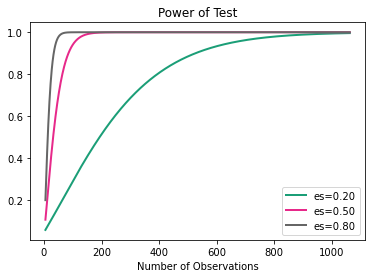

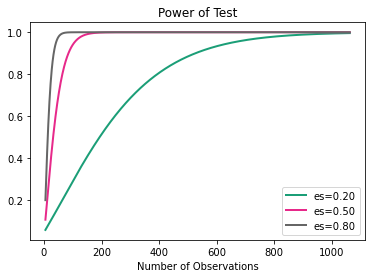

In [26]:
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=np.arange(5, len(heal)), effect_size=np.array([0.2, 0.5, 0.8]), alpha=0.05)

Начнем проводить тесты

Н0 Игроки в роле "хил" и в роле "дд" в среднем получают одинаковое количесво очков "чести"<br>
На Игроки в роле "хил" и в роле "дд" в среднем получают не одинаковое количесво очков "чести"

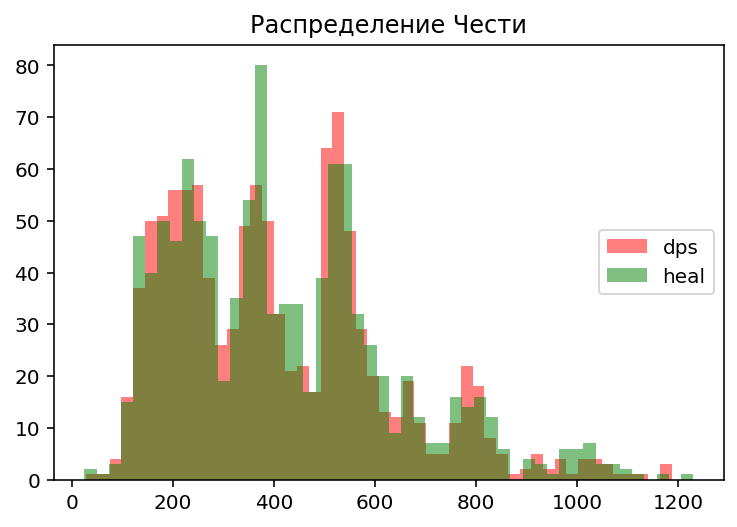

In [37]:
plt.hist(heal, bins = 50, alpha = 0.5, label = 'dps', color = 'red')
plt.hist(dd_2, bins = 50, alpha = 0.5, label = 'heal', color = 'green')
plt.legend(loc = 'right')
plt.title('Распределение Чести')
plt.show()

In [17]:
sts.kstest(heal, sts.norm.cdf)

KstestResult(statistic=1.0, pvalue=0.0)

In [18]:
sts.ttest_ind(heal, dd_2)

Ttest_indResult(statistic=0.6452656253112207, pvalue=0.5188246924481718)

In [22]:
sts.wilcoxon(heal, dd_2)

WilcoxonResult(statistic=275064.0, pvalue=0.4421972403089477)

In [38]:
samples = [np.random.choice(heal, size=100) for _ in range(1000)]
len(samples)

1000

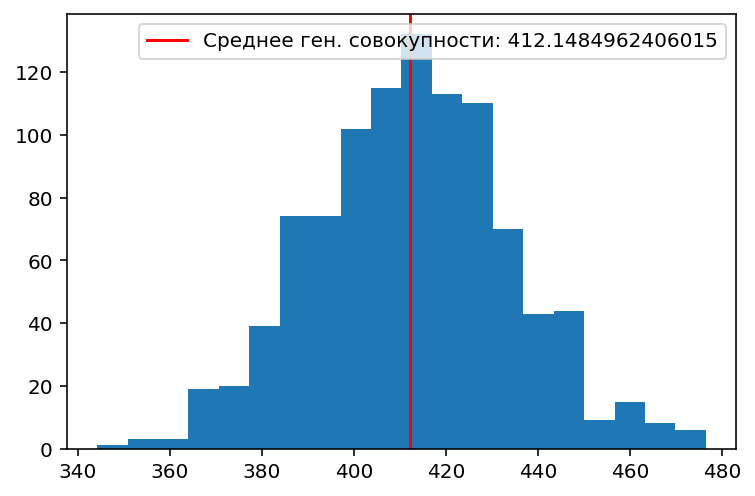

In [41]:
samples_mean = [i.mean() for i in samples]
plt.hist(samples_mean, bins=20)[-1]
plt.axvline(heal.mean(), c='red', label=f'Среднее ген. совокупности: {heal.mean()}')
plt.legend()

In [50]:
P90 = 90

left = np.percentile(samples_mean, (100 - P90) // 2)
right = np.percentile(samples_mean, P90 + (100 - P90) // 2)
print(f'Доверительный интервал для вероятности {P90}%: [{left}, {right}]')

P95 = 95

left = np.percentile(samples_mean, (100 - P95) // 2)
right = np.percentile(samples_mean, P95 + (100 - P95) // 2)
print(f'Доверительный интервал для вероятности {P95}%: [{left}, {right}]')

P99 = 99

left = np.percentile(samples_mean, (100 - P99) // 2)
right = np.percentile(samples_mean, P99 + (100 - P99) // 2)
print(f'Доверительный интервал для вероятности {P99}%: [{left}, {right}]')

Доверительный интервал для вероятности 90%: [378.983, 447.28799999999995]
Доверительный интервал для вероятности 95%: [368.5324, 453.8608]
Доверительный интервал для вероятности 99%: [335.63, 464.96779999999995]


In [43]:
samples = [np.random.choice(dd, size=100) for _ in range(1000)]
len(samples)

1000

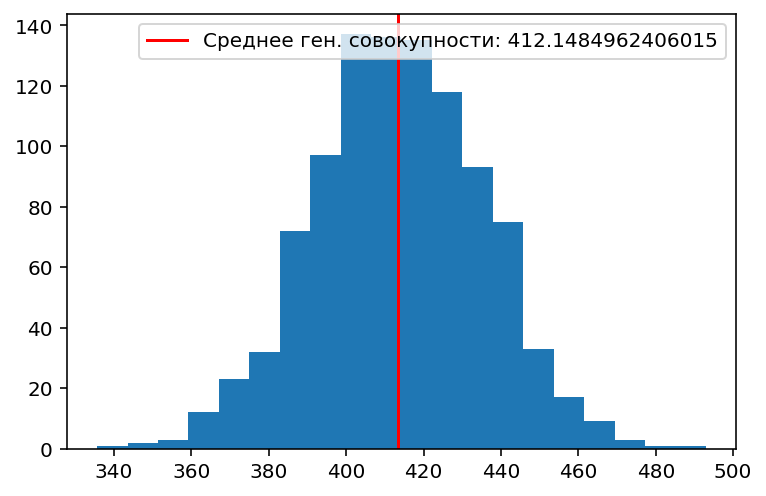

In [45]:
samples_mean = [i.mean() for i in samples]
plt.hist(samples_mean, bins=20)[-1]
plt.axvline(dd.mean(), c='red', label=f'Среднее ген. совокупности: {heal.mean()}')
plt.legend()

In [51]:
P90 = 90

left = np.percentile(samples_mean, (100 - P90) // 2)
right = np.percentile(samples_mean, P90 + (100 - P90) // 2)
print(f'Доверительный интервал для вероятности {P90}%: [{left}, {right}]')

P95 = 95

left = np.percentile(samples_mean, (100 - P95) // 2)
right = np.percentile(samples_mean, P95 + (100 - P95) // 2)
print(f'Доверительный интервал для вероятности {P95}%: [{left}, {right}]')

P99 = 99

left = np.percentile(samples_mean, (100 - P99) // 2)
right = np.percentile(samples_mean, P99 + (100 - P99) // 2)
print(f'Доверительный интервал для вероятности {P99}%: [{left}, {right}]')

Доверительный интервал для вероятности 90%: [378.983, 447.28799999999995]
Доверительный интервал для вероятности 95%: [368.5324, 453.8608]
Доверительный интервал для вероятности 99%: [335.63, 464.96779999999995]
